In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import jax
import jax.numpy as jnp

In [2]:
df_025 = pd.read_csv("results_0.25.csv", index_col=0)
df_050 = pd.read_csv("results_0.5.csv", index_col=0)
df_075 = pd.read_csv("results_0.75.csv", index_col=0)
df_100 = pd.read_csv("results_1.csv", index_col=0)

all_dfs = [df_025, df_050, df_075, df_100]


[df.insert(14, "LD_ratio", df["L"]/ df["D"]) for df in all_dfs];

In [3]:
[df.insert(14, "lift_error", (df["L"] - df["lift_goal"]).abs() / df["lift_goal"]) for df in all_dfs]

all_cleaned_dfs = [df.query("lift_error <= 0.01").copy() for df in all_dfs]

In [4]:
def avg_and_std(values):

    return (jnp.average(values), jnp.std(values))

In [5]:
lift_goal = all_dfs[0]["lift_goal"]

#Lift of unique lift goals
lift_goals = jnp.array(lift_goal)[::10]
lift_goals

Array([   5000.   ,  115555.555,  226111.11 ,  336666.66 ,  447222.22 ,
        557777.8  ,  668333.3  ,  778888.9  ,  889444.44 , 1000000.   ],      dtype=float32)

In [6]:
def batch_by_lift(df, column):
    total = []
    for goal in lift_goals:
        filtered = df[df["lift_goal"] == goal]
        total.append(jnp.array(filtered[column]).mean())
        
    return jnp.array(total)

In [7]:
from matplotlib.ticker import FuncFormatter


def sci_format(x,lim):
    return '{:.0e}'.format(x)

major_formatter = FuncFormatter(sci_format)

In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Lift Error

## Uncleaned Dataset

Average Lift Error: [0.28878742 0.22431198 0.3275491  0.19137917]
Standard Deviation: [0.26502785 0.25828704 0.374749   0.24297614]


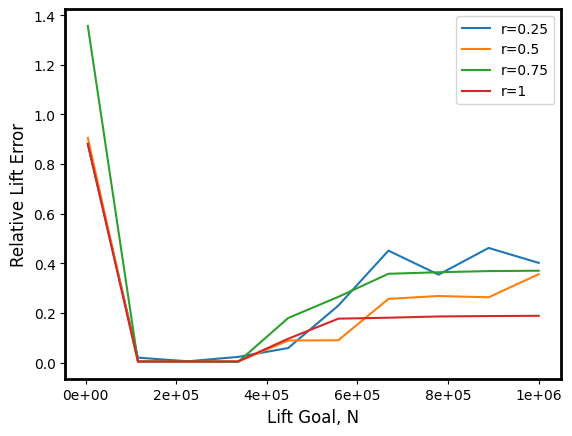

In [9]:
#Batch the lift errors
lift_errors = [batch_by_lift(df, "lift_error") for df in all_dfs]

average, stddev = jnp.array([avg_and_std(lift_error) for lift_error in lift_errors]).T

print("Average Lift Error:", average)
print("Standard Deviation:", stddev)

if True:
    fig, ax = plt.subplots()
    
    plt.setp(ax.spines.values(), linewidth=2)

    ax.get_xaxis().set_major_formatter(major_formatter)

    #Plot errors against the lift goals
    for lift_error, label in zip(lift_errors, [0.25, 0.5, 0.75, 1]):
        ax.plot(lift_goals, lift_error, label=f"r={label}")

    ax.set(xlabel="Lift Goal, N", ylabel="Relative Lift Error")
    ax.legend()

    fig.savefig(
        "./graphs/uncleaned_lift_error.pdf",
        bbox_inches='tight',
    )

    fig.show();

## Cleaned Dataset

Average Lift Error: 0.0034470223
Standard Deviation: 0.0009266864


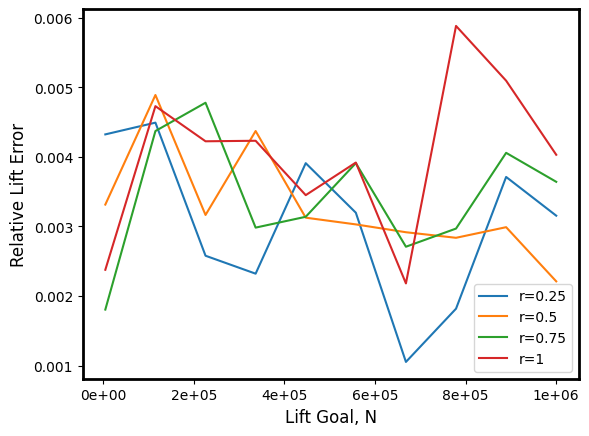

In [10]:
#Batch the lift errors
lift_errors = [batch_by_lift(df, "lift_error") for df in all_cleaned_dfs]

average, stddev = jnp.array([avg_and_std(lift_error) for lift_error in lift_errors]).T

print("Average Lift Error:", average.mean())
print("Standard Deviation:", stddev.mean())

if True:
    fig, ax = plt.subplots()
    
    plt.setp(ax.spines.values(), linewidth=2)

    ax.get_xaxis().set_major_formatter(major_formatter)


    #Plot errors against the lift goals
    for lift_error, label in zip(lift_errors, [0.25, 0.5, 0.75, 1]):
        ax.plot(lift_goals, lift_error, label=f"r={label}")

    ax.set(xlabel="Lift Goal, N", ylabel="Relative Lift Error")
    ax.legend()

    fig.savefig(
        "./graphs/cleaned_lift_error.pdf",
        bbox_inches='tight',
    )

    fig.show();

# $L/D$ Ratio

## Uncleaned Dataset

Average L/D Ratio: [40.68815  45.33108  45.539127 45.372883]
Standard Deviation: [6.4545956 4.6281    4.419789  4.5468554]


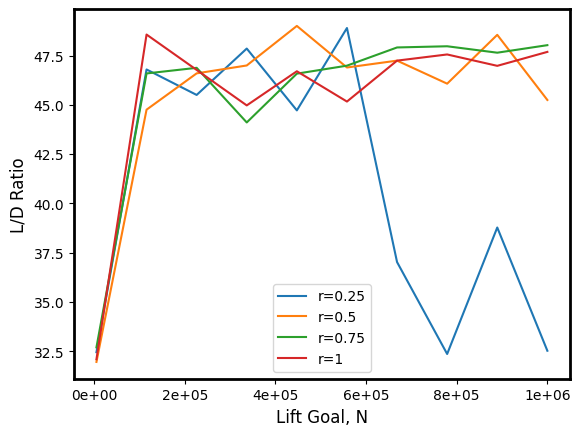

In [11]:
#Batch the lift errors
ld_ratios = [batch_by_lift(df, "LD_ratio") for df in all_dfs]

average, stddev = jnp.array([avg_and_std(ld_ratio) for ld_ratio in ld_ratios]).T

print("Average L/D Ratio:", average)
print("Standard Deviation:", stddev)

if True:
    fig, ax = plt.subplots()
    
    plt.setp(ax.spines.values(), linewidth=2)

    ax.get_xaxis().set_major_formatter(major_formatter)

    #Plot L/D ratio against the lift goals
    for ld_ratio, label in zip(ld_ratios, [0.25, 0.5, 0.75, 1]):
        ax.plot(lift_goals, ld_ratio, label=f"r={label}")

    ax.set(xlabel="Lift Goal, N", ylabel="L/D Ratio")
    ax.legend()

    fig.savefig(
        "./graphs/uncleaned_ld_ratio.pdf",
        bbox_inches='tight',
    )

    fig.show();

## Cleaned Dataset

Average L/D Ratio: 43.133675
Standard Deviation: 5.201307


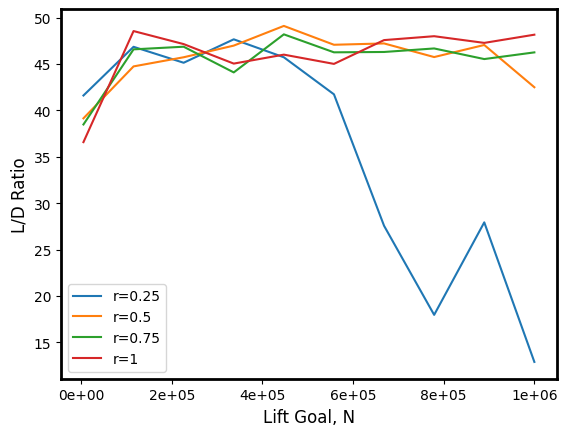

In [12]:
#Batch the lift errors
ld_ratios = [batch_by_lift(df, "LD_ratio") for df in all_cleaned_dfs]

average, stddev = jnp.array([avg_and_std(ld_ratio) for ld_ratio in ld_ratios]).T

print("Average L/D Ratio:", average.mean())
print("Standard Deviation:", stddev.mean())

if True:
    fig, ax = plt.subplots()
    
    plt.setp(ax.spines.values(), linewidth=2)

    ax.get_xaxis().set_major_formatter(major_formatter)

    
    #Plot L/D ratio against the lift goals
    for ld_ratio, label in zip(ld_ratios, [0.25, 0.5, 0.75, 1]):
        ax.plot(lift_goals, ld_ratio, label=f"r={label}")

    ax.set(xlabel="Lift Goal, N", ylabel="L/D Ratio")
    ax.legend()

    fig.savefig(
        "./graphs/cleaned_ld_ratio.pdf",
        bbox_inches='tight',
    )

    fig.show();

# Optimizer Runtime

## Uncleaned dataset

Average Time: [122.87874   65.935875  91.72821   64.61205 ]
Standard Deviation: [46.867737 41.21416  51.139297 28.440544]


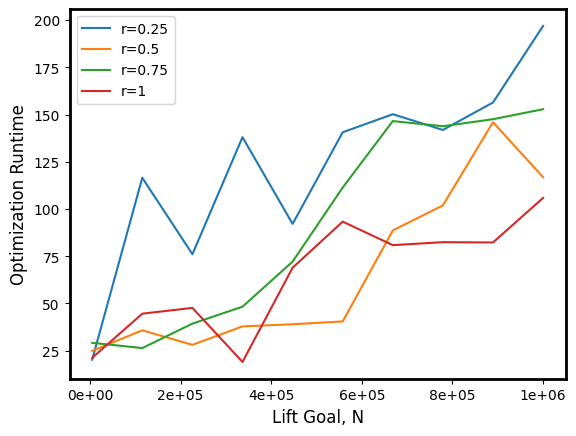

In [13]:
times = [batch_by_lift(df, "time") for df in all_dfs]

average, stddev = jnp.array([avg_and_std(time) for time in times]).T

print("Average Time:", average)
print("Standard Deviation:", stddev)

if True:
    
    fig, ax = plt.subplots()
    plt.setp(ax.spines.values(), linewidth=2)

    ax.get_xaxis().set_major_formatter(major_formatter)


    #Plot times against the lift goals
    for time, label in zip(times, [0.25, 0.5, 0.75, 1]):
        ax.plot(lift_goals, time, label=f"r={label}")

    ax.set(xlabel="Lift Goal, N", ylabel="Optimization Runtime")
    ax.legend()

    fig.savefig(
        "./graphs/uncleaned_time.pdf",
        bbox_inches='tight',
    )

    fig.show();

## Cleaned Dataset

Average Time: 42.76652
Standard Deviation: 16.757084


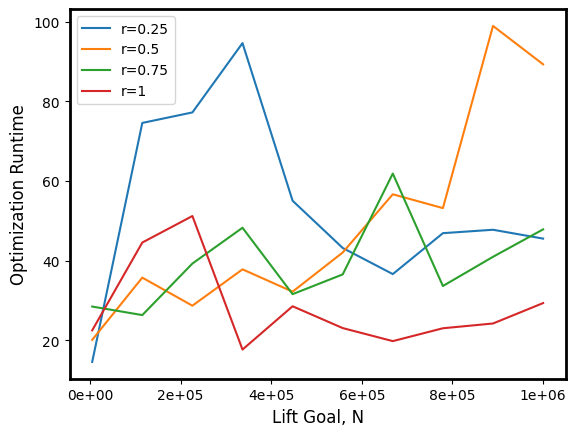

In [14]:
times = [batch_by_lift(df, "time") for df in all_cleaned_dfs]

average, stddev = jnp.array([avg_and_std(time) for time in times]).T

print("Average Time:", average.mean())
print("Standard Deviation:", stddev.mean())

if True:
    
    fig, ax = plt.subplots()
    plt.setp(ax.spines.values(), linewidth=2)

    ax.get_xaxis().set_major_formatter(major_formatter)

    #Plot times against the lift goals
    for time, label in zip(times, [0.25, 0.5, 0.75, 1]):
        ax.plot(lift_goals, time, label=f"r={label}")
        
    ax.set(xlabel="Lift Goal, N", ylabel="Optimization Runtime")
    ax.legend()

    fig.savefig(
        "./graphs/cleaned_time.pdf",
        bbox_inches='tight',
    )

    fig.show();

# Surrogate validation loss
Note: There is no data analysis here, only plotting. All validation data was collected after training the neural networks.

Slope: -0.0013477249


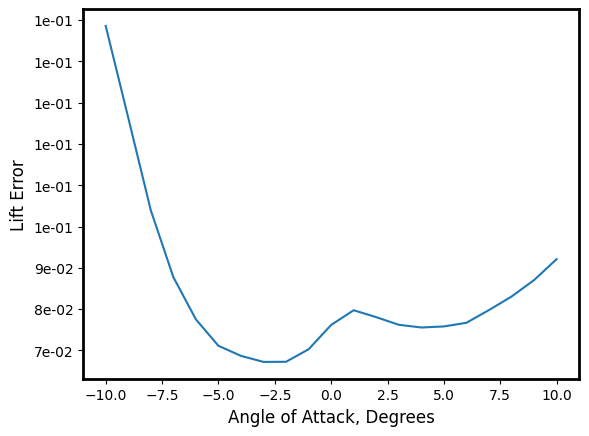

In [15]:
alphas = jnp.array([-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, -0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
lift_errors = jnp.array([0.14857908, 0.1263491, 0.10394182, 0.08775361, 0.077522315, 0.0711188, 0.06867903, 0.067211986, 0.06724958, 0.07027316, 0.07616887, 0.079729624, 0.07804949, 0.076205835, 0.075549155, 0.07580478, 0.07669093, 0.079772055, 0.08304291, 0.087030284, 0.09210141])

fig, ax = plt.subplots()
plt.setp(ax.spines.values(), linewidth=2)

ax.get_yaxis().set_major_formatter(major_formatter)

#Line of best fit
best_fit = jnp.polyfit(alphas, lift_errors, 1)
print("Slope:", best_fit[0])

#Plot errors against the lift goals
ax.plot(alphas, lift_errors)

ax.set(xlabel="Angle of Attack, Degrees", ylabel="Lift Error")

fig.savefig(
    "./graphs/lift_error.pdf",
    bbox_inches='tight',
)

fig.show();

Slope: -0.00046030284


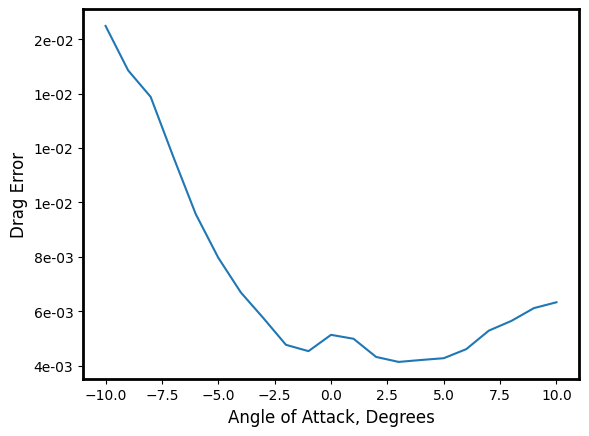

In [16]:
drag_errors = jnp.array([0.016487412, 0.014853964, 0.013878155, 0.011684904, 0.009568411, 0.00796277, 0.0066874204, 0.0057438435, 0.0047624484, 0.0045293234, 0.0051289457, 0.0049842, 0.004316453, 0.00413323, 0.004205009, 0.0042698975, 0.004603968, 0.0052841213, 0.0056413393, 0.006112467, 0.006326402])

fig, ax = plt.subplots()
plt.setp(ax.spines.values(), linewidth=2)

ax.get_yaxis().set_major_formatter(major_formatter)

#Line of best fit
best_fit = jnp.polyfit(alphas, drag_errors, 1)
print("Slope:", best_fit[0])

#Plot errors against the lift goals
ax.plot(alphas, drag_errors)

ax.set(xlabel="Angle of Attack, Degrees", ylabel="Drag Error")

fig.savefig(
    "./graphs/drag_error.pdf",
    bbox_inches='tight',
)

fig.show();